[*********************100%***********************]  5 of 5 completed


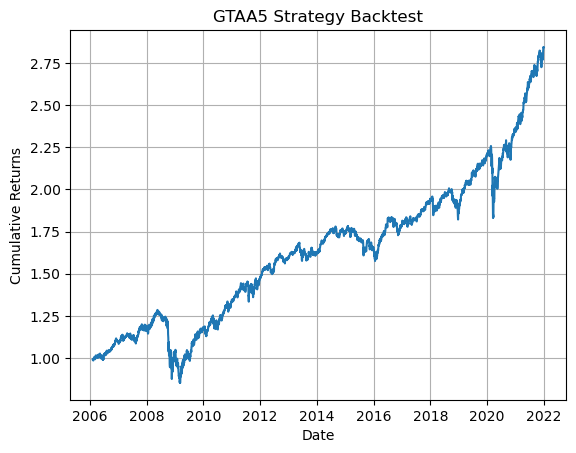

Annualized Return (CAGR): 4.87%
Annualized Volatility: 10.87%
Maximum Drawdown: -33.69%


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)["Adj Close"]
    return data

def calculate_weights(data):
    # Calculate weights based on equal allocation
    num_assets = len(data.columns)
    weights = np.ones(num_assets) / num_assets
    return weights

def calculate_returns(data, weights):
    # Calculate portfolio returns
    portfolio_returns = data.pct_change().dot(weights)
    return portfolio_returns

def calculate_mdd(cumulative_returns):
    # Calculate the drawdowns
    peak = cumulative_returns.expanding(min_periods=1).max()
    drawdown = (cumulative_returns - peak) / peak

    # Find the maximum drawdown
    max_drawdown = drawdown.min()

    return max_drawdown

def calculate_cagr(total_return, num_years):
    # Calculate Compound Annual Growth Rate (CAGR)
    cagr = (total_return ** (1 / num_years)) - 1

    return cagr

def backtest_gtaa5_strategy(tickers, start_date, end_date):
    # Get data
    data = get_data(tickers, start_date, end_date)

    # Calculate weights
    weights = calculate_weights(data)

    # Calculate returns
    portfolio_returns = calculate_returns(data, weights)

    # Calculate cumulative returns
    cumulative_returns = (portfolio_returns + 1).cumprod()

    # Calculate annualized returns
    total_return = cumulative_returns[-1]
    num_years = len(data) / 252  # Assume 252 trading days in a year
    annualized_return = calculate_cagr(total_return, num_years)

    # Calculate annualized volatility
    annualized_volatility = portfolio_returns.std() * np.sqrt(252)

    # Calculate maximum drawdown
    max_drawdown = calculate_mdd(cumulative_returns)

    # Plot cumulative returns
    plt.plot(cumulative_returns)
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.title('GTAA5 Strategy Backtest')
    plt.grid(True)
    plt.show()

    # Print performance metrics
    print("Annualized Return (CAGR): {:.2%}".format(annualized_return))
    print("Annualized Volatility: {:.2%}".format(annualized_volatility))
    print("Maximum Drawdown: {:.2%}".format(max_drawdown))

# Define the tickers and the date range
tickers = ["SPY", "TLT", "DBC", "VNQ", "SHY"]
start_date = "2000-01-01"
end_date = "2022-01-01"

# Run the backtest
backtest_gtaa5_strategy(tickers, start_date, end_date)
